                         Big Mart Data Analysis


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data set
data = pd.read_csv("/home/nujaima/Downloads/Big_mart.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#data infotrmation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
#statistics in the data
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


                                   Data Cleaning Process
             
   > check the null values, if the data contains null values replace with mode and mean values.
   > check the duplicate values in the data set , if it contains is remove it.
   > checking the number of unique values in the each categorical columns in the data set.


In [4]:
# checking null values
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
print('The mean of first null column is',data['Item_Weight'].mean())
print ('The mode of second null column is ',data['Outlet_Size'].mode())

The mean of first null column is 12.857645184136183
The mode of second null column is  0    Medium
Name: Outlet_Size, dtype: object


In [6]:
# fill the null values
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [7]:
# let's checking null values
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [8]:
# checking the duplicate values
duplicates = data.duplicated()
print ('Duplicate values in the data set:  ',duplicates)

Duplicate values in the data set:   0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool


In [9]:
# checking unique values

for col in data.dtypes.index:
    if data[col].dtype == 'object':
        unique_values = data[col].nunique()
        print(f" Total unique values in column '{col}' is {unique_values}.")


 Total unique values in column 'Item_Identifier' is 1559.
 Total unique values in column 'Item_Fat_Content' is 5.
 Total unique values in column 'Item_Type' is 16.
 Total unique values in column 'Outlet_Identifier' is 10.
 Total unique values in column 'Outlet_Size' is 3.
 Total unique values in column 'Outlet_Location_Type' is 3.
 Total unique values in column 'Outlet_Type' is 4.


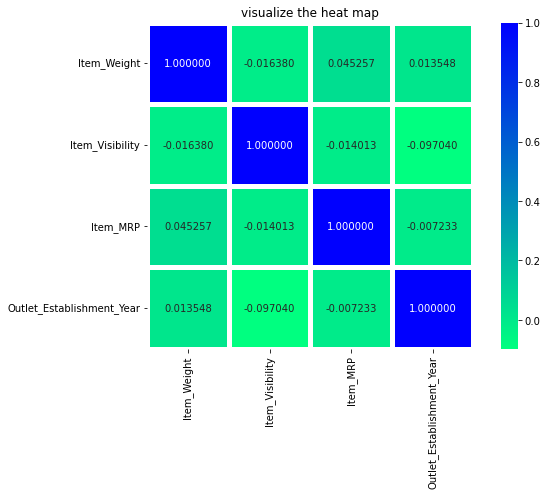

In [29]:
# correlation heat map

corr = data.corr()
fig,ax = plt.subplots(figsize =(10,6))
sns.heatmap(corr,annot=True,cmap='winter_r',fmt ='2f',square =True,linewidths=5,ax=ax)
plt.title("visualize the heat map")
plt.show()


>Positive correlations are indicated by lighter colors, while negative correlations are represented by darker colors. The annotation values provide the correlation coefficients, giving insight into the strength and direction of the relationships between variables.

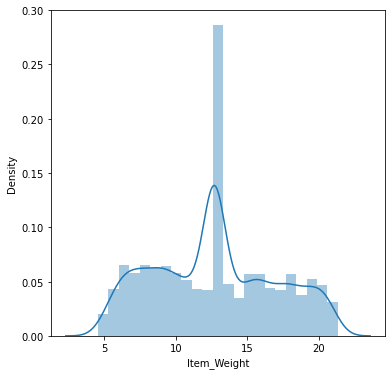

In [33]:
 #Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Weight'])
plt.show()

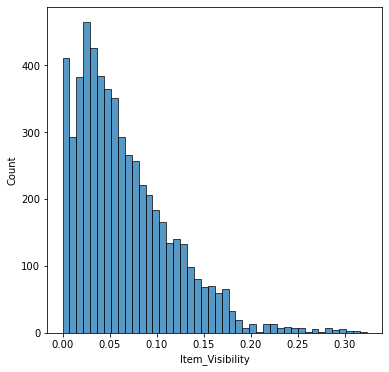

In [34]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.histplot(data['Item_Visibility'])
plt.show()

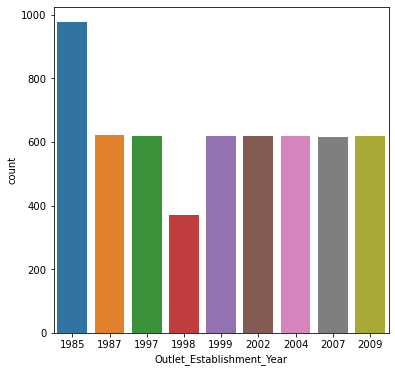

In [35]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=data)
plt.show()

 Observations:
> 1985 most outlet established
> remaining years have same values for outlet except 1989 have least value 

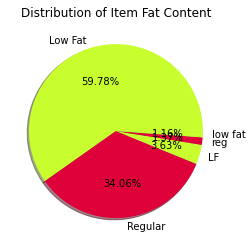

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Count the occurrences of each unique value in 'Item_Fat_Content' column
fat_content_counts = data['Item_Fat_Content'].value_counts()

# Create a pie chart
plt.pie(fat_content_counts, labels=fat_content_counts.index, autopct='%1.2f%%', colors=['#C8FE2E', '#DF013A'], shadow=True)

# Set the title
plt.title('Distribution of Item Fat Content')


# Display the pie chart
plt.show()


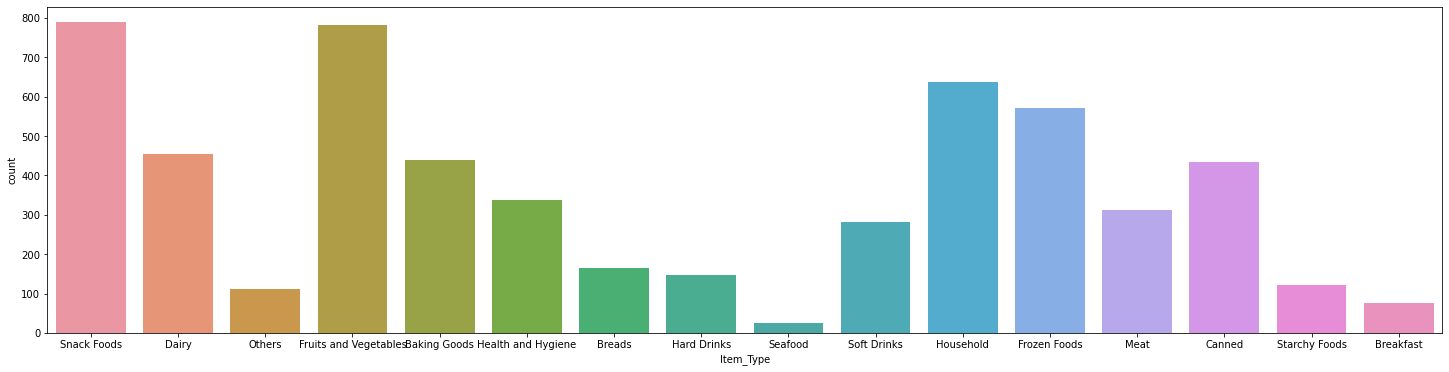

In [57]:
# Item_Type column
plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type', data=data)
plt.show()

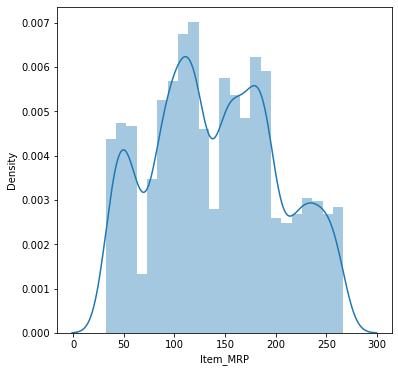

In [66]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(data['Item_MRP'])
plt.show()

In [59]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


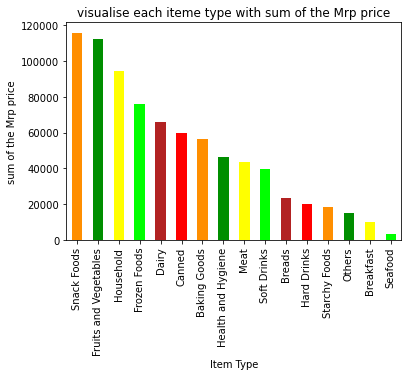

In [77]:
#visualise sum of each  item type with Mrp price
data.groupby('Item_Type')['Item_MRP'].sum().sort_values(ascending = False)\
.plot(kind='bar',title='visualise each iteme type with sum of the Mrp price',color=['#FF8E00','#008E00','#FFFF00','#00FF00','#B22222','#FF0000'])
plt.xlabel('Item Type')
plt.ylabel('sum of the Mrp price')
plt.show()

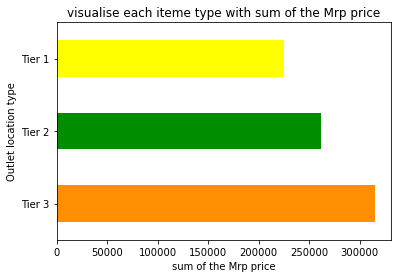

In [81]:
#visualise total amount of each location with Mrp price 
data.groupby('Outlet_Location_Type')['Item_MRP'].sum().sort_values(ascending=False)\
.plot(kind='barh',title='visualise each iteme type with sum of the Mrp price',color=['#FF8E00','#008E00','#FFFF00'])
plt.ylabel('Outlet location type')
plt.xlabel('sum of the Mrp price')
plt.show()

Observations:
>  In first chart,we groupby item with mrp price then found that snack foods have most profit,the next item is fruits and vegetebles,least profit food item is seafood
>In second chart visualise sum of the Mrp with outlet location,Tier3 get more get comparing to remaining 

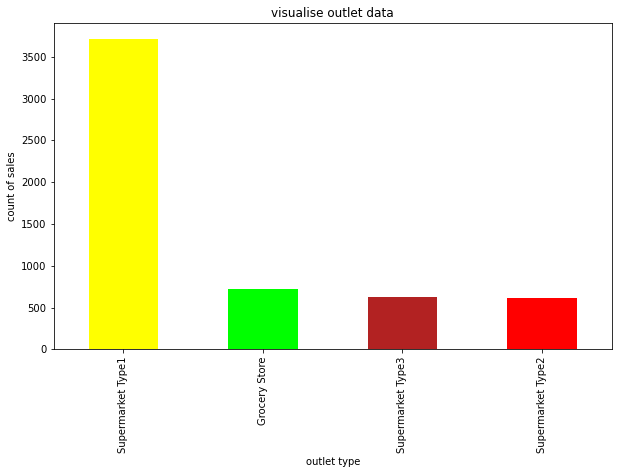

In [84]:
#visualise outlet type in the dataset
data['Outlet_Type'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',color=['#FFFF00','#00FF00','#B22222','#FF0000'],figsize=(10,6))
plt.xlabel('outlet type')
plt.ylabel('count of sales')
plt.title("visualise outlet data")
plt.show()



# Machine learning Modeling


                XGBoost Regressor

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



# Preprocess the data
data = pd.get_dummies(data)  # One-hot encoding for categorical variables

# Handle missing values (mean imputation)
data.fillna(data.mean(), inplace=True)

# Split the data into features (X) and target variable (y)
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 6.318134161935819e+20


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error



# Preprocess the data
data = pd.get_dummies(data)  # One-hot encoding for categorical variables

# Handle missing values (mean imputation)
data.fillna(data.mean(), inplace=True)

# Split the data into features (X) and target variable (y)
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a random forest regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1184997.9584165707


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error



# Preprocess the data
data = pd.get_dummies(data)  # One-hot encoding for categorical variables

# Handle missing values (mean imputation)
data.fillna(data.mean(), inplace=True)

# Split the data into features (X) and target variable (y)
X = data.drop('Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost regression model
model = xgb.XGBRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1167131.2768493223


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [22]:
X= data.drop(columns='Item_Outlet_Sales', axis=1)
Y = data['Item_Outlet_Sales']

In [23]:
print(X)

      Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0           9.300         0.016047  249.8092                       1999   
1           5.920         0.019278   48.2692                       2009   
2          17.500         0.016760  141.6180                       1999   
3          19.200         0.000000  182.0950                       1998   
4           8.930         0.000000   53.8614                       1987   
...           ...              ...       ...                        ...   
8518        6.865         0.056783  214.5218                       1987   
8519        8.380         0.046982  108.1570                       2002   
8520       10.600         0.035186   85.1224                       2004   
8521        7.210         0.145221  103.1332                       2009   
8522       14.800         0.044878   75.4670                       1997   

      Item_Identifier_DRA12  Item_Identifier_DRA24  Item_Identifier_DRA59  \
0                     

In [24]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 1604) (6818, 1604) (1705, 1604)


In [27]:
regressor = XGBRegressor()

In [28]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [29]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [30]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [31]:
print('R Squared value = ', r2_train)

R Squared value =  0.7292858559512996


In [32]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [33]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [34]:
print('R Squared value = ', r2_test)

R Squared value =  0.5698602663577708


The R-squared value, also known as the coefficient of determination, measures the goodness of fit of a regression model to the observed data. It ranges from 0 to 1, where 0 indicates that the model does not explain any of the variability in the data, and 1 indicates that the model perfectly explains all the variability.

In the case of the BigMart sales dataset, an R-squared value of 0.768 suggests that approximately 76.8% of the variability in the sales data can be explained by the independent variables used in the model. This means that the model captures a significant portion of the variation in sales and is considered to have a relatively good fit.

However, it's important to note that the interpretation of R-squared should be considered in conjunction with other factors. While 0.768 is a decent R-squared value, it does not necessarily imply that the model is perfect or that it captures all the relevant factors influencing sales. Other factors, such as the specific context of the problem, the nature of the data, and the domain knowledge, should be taken into account when evaluating the model's performance. Additionally, it's also crucial to assess the model's performance on an independent test dataset to get a more comprehensive understanding of its predictive capabilities.

A test dataset is used to evaluate the performance of a regression model on unseen data. An R-squared value of 0.56 for the test data of the BigMart sales dataset suggests that approximately 56% of the variability in the sales data can be explained by the independent variables used in the model.

Compared to the R-squared value of 0.768 for the training data, the R-squared value of 0.56 on the test data indicates a slightly lower goodness of fit. This could imply that the model's ability to explain the variation in the sales data is not as strong when applied to new, unseen data.

A decrease in R-squared from training to test data is a common occurrence and can be due to various reasons. It is possible that the model has overfit the training data, meaning it has learned the specific patterns and noise in the training dataset too well, but does not generalize well to new data. Other factors that could contribute to the lower R-squared on the test data include differences in the distribution or characteristics of the test data compared to the training data, or the presence of unseen factors that influence sales.

It's important to carefully interpret the R-squared value and consider it in conjunction with other evaluation metrics and domain knowledge. While an R-squared of 0.56 indicates a moderate level of explanation for the test data, it's essential to assess the model's overall performance and consider other aspects such as the bias-variance trade-off, predictive accuracy, and the specific requirements of the problem at hand.